#  Perceived vs Actual Barriers to exercise over Gender & Age Discrepancies

```
Authors:
    Zach Wolpe
    zachcolinwolpe@gmail.com
    www.zachwolpe.com
    
    Michelle Gilfillan
    u16095503@tuks.co.za
```


### Description

physiotherapeutic research investigating the __PERCEIVED__ vs __Actual__ barriers to exercise exhibited in the elderly. We have conducted a brief statistical analysis of their findings.

#### Investigating the discrepancies between age and gender categories


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('./data/correct_final_data.xlsx' )
df.columns = ['Name', 'Participant', 'Age', 'Sex', 'Kasari', 'Active mins per Week > 150', 
            'Lack of time','Social Influence', 'Lack of energy', 'Lack of will power',
            'Fear of Injury', 'Lack of Skill', 'Lack of Resources', 'Resting_blood_pressure_Systolic',
       'Resting_blood_pressure_Diastolic', 'Resting HR', 'Stature (m)',
       'Mass (kg)', 'BMI (kg/m²)', 'Wasit-to-hip Ratio', '% BF',
       '2 min step test']
print(df.shape)
df.head()

(49, 22)


,Name,Participant,Age,Sex,Kasari,Active mins per Week > 150,Lack of time,Social Influence,Lack of energy,Lack of will power,...,Lack of Resources,Resting_blood_pressure_Systolic,Resting_blood_pressure_Diastolic,Resting HR,Stature (m),Mass (kg),BMI (kg/m²),Wasit-to-hip Ratio,% BF,2 min step test
0,Boris Savvas,1,66.0,M,48,active,0,0,0,0,...,0,110.0,70.0,60.0,1.72,84.7,28.63,0.91,26.5,127
1,Pamela Strydom,2,80.0,F,64,active,0,0,3,0,...,1,130.0,70.0,80.0,1.44,36.8,17.74,0.72,15.1,120
2,Petrus Strydom,3,83.0,M,40,active,6,0,0,1,...,0,120.0,65.0,64.0,1.64,63.9,23.47,0.86,21.2,120
3,Elsa Eksteen,6,65.0,F,48,active,0,0,0,0,...,0,110.0,65.0,52.0,1.63,52.0,19.57,0.75,28.3,107
4,Rita Leibach,16,78.0,F,6,inactive,1,3,0,7,...,2,110.0,65.0,60.0,1.62,51.8,19.73,0.73,31.8,76


In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 22 columns):
Name                                49 non-null object
Participant                         49 non-null object
Age                                 44 non-null float64
Sex                                 49 non-null object
Kasari                              49 non-null int64
Active mins per Week > 150          49 non-null object
Lack of time                        49 non-null int64
Social Influence                    49 non-null int64
Lack of energy                      49 non-null int64
Lack of will power                  49 non-null int64
Fear of Injury                      49 non-null int64
Lack of Skill                       49 non-null int64
Lack of Resources                   49 non-null int64
Resting_blood_pressure_Systolic     46 non-null float64
Resting_blood_pressure_Diastolic    46 non-null float64
Resting HR                          44 non-null float64
Stature (m)          

In [4]:
df = pd.read_excel('./data/data to be analyzed.xlsx' , header=1)
df.columns = ['Name', 'Participant', 'Age', 'Sex', 'Lack of time',
       'Social Influence', 'Lack of energy', 'Lack of will power',
       'Fear of Injury', 'Lack of Skill', 'Lack of Resources']
print(df.shape)
df.head()

(55, 11)


,Name,Participant,Age,Sex,Lack of time,Social Influence,Lack of energy,Lack of will power,Fear of Injury,Lack of Skill,Lack of Resources
0,Boris Savvas,1,66.0,M,0,0,0,0,0,0,0
1,Pamela Strydom,2,80.0,F,0,0,3,0,0,1,1
2,Petrus Strydom,3,83.0,M,6,0,0,1,0,0,0
3,Elsa Eksteen,6,65.0,F,0,0,0,0,0,0,0
4,Rita Leibach,16,78.0,F,1,3,0,7,2,0,2


In [5]:
# Hangle missing data df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 11 columns):
Name                  55 non-null object
Participant           55 non-null object
Age                   50 non-null float64
Sex                   55 non-null object
Lack of time          55 non-null int64
Social Influence      55 non-null int64
Lack of energy        55 non-null int64
Lack of will power    55 non-null int64
Fear of Injury        55 non-null int64
Lack of Skill         55 non-null int64
Lack of Resources     55 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 4.8+ KB


# Impute Missing Data

Clean data: impute missing values & covert 'Gender' to a binary variable

In [6]:
# Impute missing values (Age using mean)
df['Age'] = df['Age'].fillna(df['Age'].mean())


# convert gender to binary
gender = {'M': 1,
          'F': 0}

df.Sex = [gender[i] for i in df.Sex]

df.head()

,Name,Participant,Age,Sex,Lack of time,Social Influence,Lack of energy,Lack of will power,Fear of Injury,Lack of Skill,Lack of Resources
0,Boris Savvas,1,66.0,1,0,0,0,0,0,0,0
1,Pamela Strydom,2,80.0,0,0,0,3,0,0,1,1
2,Petrus Strydom,3,83.0,1,6,0,0,1,0,0,0
3,Elsa Eksteen,6,65.0,0,0,0,0,0,0,0,0
4,Rita Leibach,16,78.0,0,1,3,0,7,2,0,2


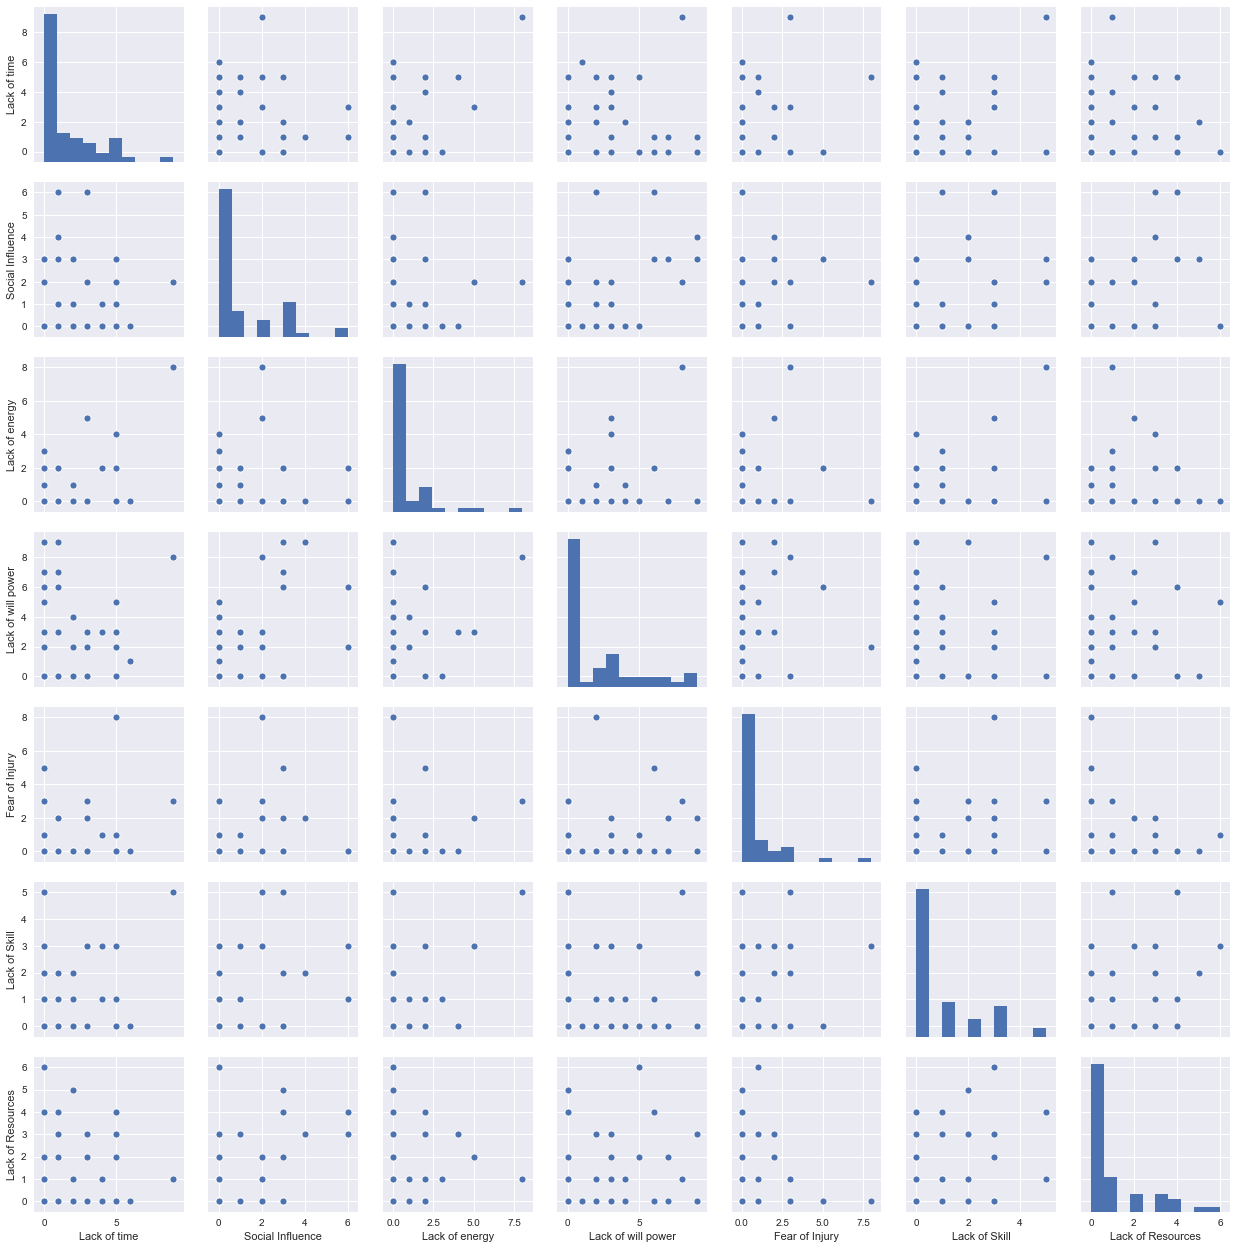

In [7]:
import seaborn as sns
# Basic correlogram
plt.style.use('seaborn')
sns.pairplot(df.iloc[:,4:], palette='YiGnBu')
plt.show()

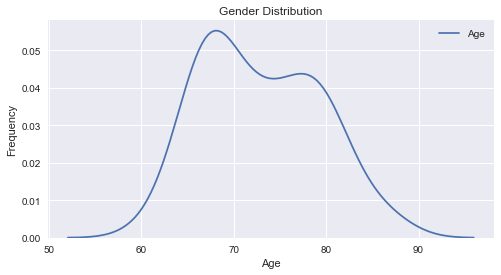

In [8]:
# age distribution
import seaborn as sns

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(8,4))
plt.xlabel('Age')
plt.title('Gender Distribution')
plt.ylabel('Frequency')
sns.kdeplot(df['Age']);

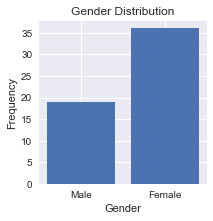

In [9]:
# age distribution
import seaborn as sns



plt.figure(figsize=(3,3))
plt.xlabel('Gender')
plt.title('Gender Distribution')
plt.ylabel('Frequency')
plt.bar(['Male', 'Female'], [df.Sex.sum(), len(df.Sex) - df.Sex.sum()]);

# plt.hist(df['Age'], bins=30, );

# Interpretation

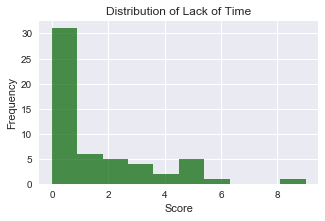

In [10]:
test = df['Lack of time']
test[:10]
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(5,3))
plt.title('Distribution of Lack of Time')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.hist(test, color='darkgreen', alpha=0.7);

# Correlation Matrix

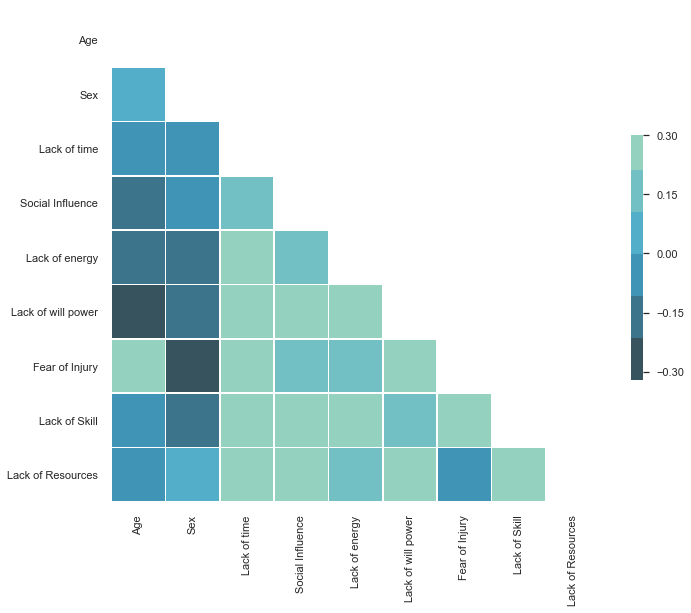

In [11]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


#np.corrcoef([df['Age'], df['Sex'], df['Lack of time'], df['Social Influence'], df['Lack of energy'],
# df['Lack of will power'], df['Fear of Injury'], df['Lack of Skill'], df['Lack of Resources']])
# Compute the correlation matrix
corr = df.iloc[:,2:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.color_palette("GnBu_d")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Simplify the Model Binary

Most distributions are ZERO with a series of (decreasing) larger values. Consider a binary analysis wherein any value greater than $)$ is $1$

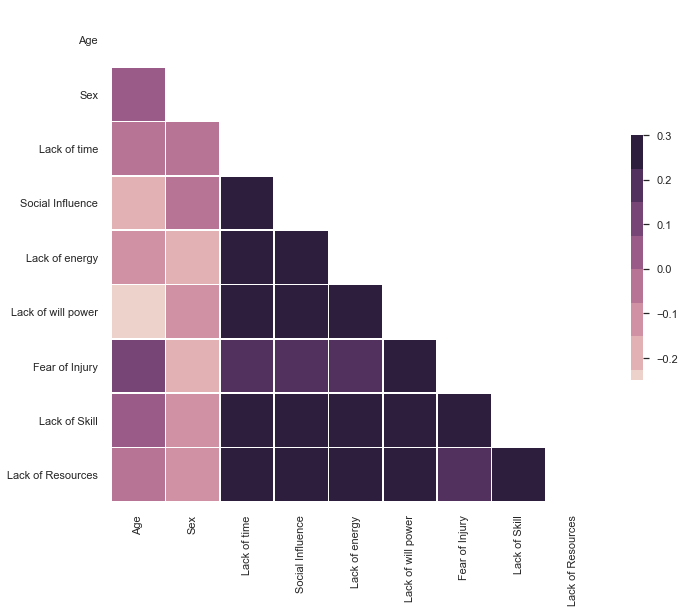

In [13]:
df_mod = df
df_mod.iloc[:,3:] = (df_mod.iloc[:,3:] > 0).astype(int)


# Compute the correlation matrix
corr = df_mod.iloc[:,2:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.cubehelix_palette(8)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Statistical Analsis of Research Objectives


# 2

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [69]:
df = pd.read_excel('./data/correct_final_data.xlsx' )
df.columns = ['Name', 'Participant', 'Age', 'Sex', 'Kasari', 'Active mins per Week > 150', 
            'Lack of time','Social Influence', 'Lack of energy', 'Lack of will power',
            'Fear of Injury', 'Lack of Skill', 'Lack of Resources', 'Resting_blood_pressure_Systolic',
       'Resting_blood_pressure_Diastolic', 'Resting HR', 'Stature (m)',
       'Mass (kg)', 'BMI (kg/m²)', 'Wasit-to-hip Ratio', '% BF',
       '2 min step test']

df['Active mins per Week > 150'] = df['Active mins per Week > 150'] == 'active'

print(df.shape)
df.head()

(49, 22)


,Name,Participant,Age,Sex,Kasari,Active mins per Week > 150,Lack of time,Social Influence,Lack of energy,Lack of will power,...,Lack of Resources,Resting_blood_pressure_Systolic,Resting_blood_pressure_Diastolic,Resting HR,Stature (m),Mass (kg),BMI (kg/m²),Wasit-to-hip Ratio,% BF,2 min step test
0,Boris Savvas,1,66.0,M,48,False,0,0,0,0,...,0,110.0,70.0,60.0,1.72,84.7,28.63,0.91,26.5,127
1,Pamela Strydom,2,80.0,F,64,True,0,0,3,0,...,1,130.0,70.0,80.0,1.44,36.8,17.74,0.72,15.1,120
2,Petrus Strydom,3,83.0,M,40,True,6,0,0,1,...,0,120.0,65.0,64.0,1.64,63.9,23.47,0.86,21.2,120
3,Elsa Eksteen,6,65.0,F,48,False,0,0,0,0,...,0,110.0,65.0,52.0,1.63,52.0,19.57,0.75,28.3,107
4,Rita Leibach,16,78.0,F,6,False,1,3,0,7,...,2,110.0,65.0,60.0,1.62,51.8,19.73,0.73,31.8,76


In [70]:
# Clean
df_sub = df[df['2 min step test'].notna()]
df_sub['2 min step test'][19] = '26'
df_sub['2 min step test'][26] = '110'
df_sub['2 min step test'] = [int(i) for i in df_sub['2 min step test']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing t

# QUESTION 2

## Describe current physical fitness status by means of Kasari fitness index (KFI) as well as the Two-minute step test (Senior Fitness Test)- write up a correlation between the two- data is newly added and describe descriptively

## Describe physical fitness (2-min step test) of the population

Roughly normal distribution of step scores

mean:  109.21428571428571
std:  37.57882871174857


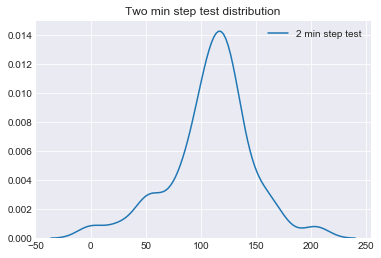

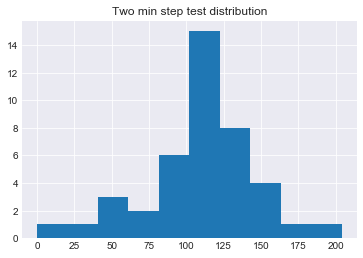

In [162]:
plt.style.use('seaborn-darkgrid')
import seaborn as sns
print('mean: ', np.mean(df_sub['2 min step test']))
print('std: ', np.std(df_sub['2 min step test']))


plt.title('Two min step test distribution')
sns.kdeplot(df_sub['2 min step test'])
plt.show()

plt.title('Two min step test distribution')
plt.hist(df_sub['2 min step test'], bins=10)
plt.show();

## Describe fitness higher in male vs female

### ANOVA:
Compare the MEAN SCORES OF each gender, see if there is statistical signicance (Same anova we've always done)

CONCLUSION:

REJECT $H0: µ_1 = µ_2$ (reject hypothis of equal means) 

p-val and test statistic below

MALES are (on average) signficantly fitter than females

In [99]:
# Create data
male_scores = df_sub[df_sub.Sex == 'M']['2 min step test']
female_scores = df_sub[df_sub.Sex != 'M']['2 min step test']

# ANOVA
import scipy.stats as st

st.f_oneway(
    male_scores,
    female_scores
)

F_onewayResult(statistic=7.826254114071277, pvalue=0.007880822875948011)

In [101]:
np.mean(male_scores), np.mean(female_scores)

(133.25, 99.6)

## Describe age category with highest fitness levels 

65-70, 70-75, 75-80, 80-85, 85-90, 90+

NOTE:

none above 85 so highest category is 80+ 

### CONCLUSION

DO NOT REJECT null hypothesis of equal means (see p-val below) - NO SIGNIFICANT DIFFERENCE BETWEEN OBSERVED AGE CATEGORIES

In [140]:
df_65 = df_sub[df_sub.Age < 70]['2 min step test']

df_70 = df_sub[70 <= df_sub.Age][df_sub.Age < 75]['2 min step test']

df_75 = df_sub[75 <= df_sub.Age][df_sub.Age < 80]['2 min step test']

df_80 = df_sub[80 <= df_sub.Age]['2 min step test']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [155]:
print('compare means of the age categories: \n')
data = [df_65, df_70, df_75, df_80]

[np.mean(i) for i in data]

compare means of the age categories: 



[26.38095238095238, 37.333333333333336, 41.90909090909091, 35.22222222222222]

In [139]:
# STATISTICAL TEST
st.f_oneway(df_65, df_70, df_75, df_80)

F_onewayResult(statistic=2.2202251279740786, pvalue=0.10254294307635026)

## Describe fitness (2 min step test) vs physical activity (kasari- inactive vs active)

CONCLUSION:
ROUGHLY UNIFORM ACROSS ALL CANDIDATES

mean:  35.38775510204081
std:  23.906122797420135


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


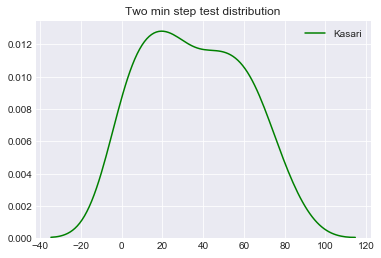

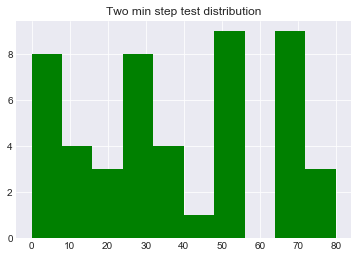

In [160]:

print('mean: ', np.mean(df['Kasari']))
print('std: ', np.std(df['Kasari']))

plt.title('Two min step test distribution')
sns.kdeplot(df['Kasari'],  c='g')
plt.show()

plt.title('Two min step test distribution')
plt.hist(df['Kasari'], bins=10,  color='g')
plt.show();

## Describe physical activity in male vs female

### CONCLUSION: 

Reject 
$$H_0: µ_m = µ_f$$
$$H_1: µ_m > µ_f$$


Males scores significantly higher

In [147]:
# Create data
male_scores = df[df.Sex == 'M']['Kasari']
female_scores = df[df.Sex != 'M']['Kasari']

# ANOVA
import scipy.stats as st

st.f_oneway(
    male_scores,
    female_scores
)

F_onewayResult(statistic=9.349033603966134, pvalue=0.0036750640665781623)

In [145]:
np.mean(male_scores), np.mean(female_scores)

(48.166666666666664, 27.967741935483872)

## Describe physical activity in age categories- which has highest levels?

### Conclusion

No difference between group (age group) means

In [157]:
df_65 = df[df.Age < 70]['Kasari']

df_70 = df[70 <= df.Age][df.Age < 75]['Kasari']

df_75 = df[75 <= df.Age][df.Age < 80]['Kasari']

df_80 = df[80 <= df.Age]['Kasari']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [158]:
print('compare means of the age categories: \n')
data = [df_65, df_70, df_75, df_80]

[np.mean(i) for i in data]

compare means of the age categories: 



[26.38095238095238, 37.333333333333336, 41.90909090909091, 35.22222222222222]

In [159]:
# STATISTICAL TEST
st.f_oneway(df_65, df_70, df_75, df_80)

F_onewayResult(statistic=1.1974526980408666, pvalue=0.3230588703887174)

## Mean and standard deviation of fitness, as well as physical activity

### == ANSWERED ABOVE IN DISTRIBUTIONS for both types of fitness tests

# Question 3 and 4

ALL IN THIS OUTPUT ASK ME FOR READIBILITY PROBLEMS

Question 4 is provided in this output

In [202]:
df['total BB'] = np.sum(df.iloc[:,6:13], axis=1)
lax = pd.concat([df.iloc[:,6:13],df['total BB']], axis=1)

In [239]:
# TEST EACH EXCUSE & THE SUM OF THE EXCUSES BY GENDER AND BY AGE CATEGORIES
for i in range(8):
    
    print('\n\n\n\n_ _ _ _ _ _ _ _ Test Column: ', lax.columns[i], '_ _ _ _ _ _ _ _\n\n')
    
    print('\n- - - - - test GENDER differences - - - - -\n')
    # test by gender
    male_scores = lax[df.Sex == 'M'].iloc[:,i]
    female_scores = lax[df.Sex != 'M'].iloc[:,i]
    print('gender ANOVA test: ', st.f_oneway(
        male_scores,
        female_scores), '\n')
    
    print('MEAN over genders: ', 'male: ', np.mean(male_scores), 'female: ', np.mean(female_scores), '\n')
    print('- - - - - ')
    
    print('\n- - - - - test AGE differences - - - - -\n')
    
    # Test by age categories 
    df_65 = lax[df.Age < 70].iloc[:,i]
    df_70 = lax[70 <= df.Age][df.Age < 75].iloc[:,i]
    df_75 = lax[75 <= df.Age][df.Age < 80].iloc[:,i]
    df_80 = lax[80 <= df.Age].iloc[:,i]
    
    print('compare means of the age categories:')
    print('< 70 : ', np.mean(df_65))
    print('70 <= x < 75 : ', np.mean(df_70))
    print('75 <= x < 80 : ', np.mean(df_75))
    print('80 <= x : ', np.mean(df_80), '\n')
    
    print('AGE ANOVA test: ', st.f_oneway(
        df_65, df_70, df_75, df_80), '\n')
    
    
    print('\n- - - - - test Active vs Inactive - - - - -\n')
    
    # Active vs Inactive
    print('- - - - - ')
    active = lax[df['Active mins per Week > 150'] == False].iloc[:,i]
    Inactive = lax[df['Active mins per Week > 150'] == True].iloc[:,i]
    
    print('mean for Active: ', np.mean(active))
    print('mean for Inactive: ', np.mean(Inactive))
    
    print('Active vs Inactive ANOVA test: ', st.f_oneway(
        active,
        Inactive), '\n')
    
    
    
    





_ _ _ _ _ _ _ _ Test Column:  Lack of time _ _ _ _ _ _ _ _



- - - - - test GENDER differences - - - - -

gender ANOVA test:  F_onewayResult(statistic=0.07654822503730704, pvalue=0.7832439502827452) 

MEAN over genders:  male:  1.2777777777777777 female:  1.4516129032258065 

- - - - - 

- - - - - test AGE differences - - - - -

compare means of the age categories:
< 70 :  1.4285714285714286
70 <= x < 75 :  4.0
75 <= x < 80 :  0.2727272727272727
80 <= x :  1.7777777777777777 

AGE ANOVA test:  F_onewayResult(statistic=3.0215481030433486, pvalue=0.040754354756247196) 


- - - - - test Active vs Inactive - - - - -

- - - - - 
mean for Active:  1.1612903225806452
mean for Inactive:  1.7777777777777777
Active vs Inactive ANOVA test:  F_onewayResult(statistic=0.9812403539513251, pvalue=0.32696529135489405) 





_ _ _ _ _ _ _ _ Test Column:  Social Influence _ _ _ _ _ _ _ _



- - - - - test GENDER differences - - - - -

gender ANOVA test:  F_onewayResult(statistic=0.3761735100315022, 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/li

## Additional Notes

### Question to Address


Objectives that must be covered:
1.	Identify barriers to exercise in the elderly by means of the Barriers to being active quiz- identify most prevelant barrier NB- main objective of study
(BBAQ-all bariers listed in excel).
-	Identify the main barrier- possibly % of frequency 
	Frequency and % prevalence of each barrier
	Main barrier in male, main barrier in female
	Barrier in age 65-70, 70-75, 75-80, 80-85, 85-90, 90+ (don’t include if no members older than 90)
2.	Describe current physical fitness status by means of Kasari fitness index (KFI)as well as the Two-minute step test (Senior Fitness Test)- write up a correlation between the two- data is newly added and describe descriptively
	Describe physical fitness (2-min step test) of the population
	Describe fitness higher in male vs female
	Describe age category with highest fitness levels 
	Describe fitness (2 min step test) vs physical activity (kasari- inactive vs active)
	Describe physical activity in male vs female
	Describe physical activity in age categories- which has highest levels?
	Mean and standard deviation of fitness, as well as physical activity
3.	Compare exercise barriers in elderly males and females (by means of demographic (this has been done?)
	BBAQ prevalence to gender and age- total BBAQ as well as individual barriers to age and gender
	Individual barriers in age categories 
	Mean of barrier extent – the score on BBAQ for each barrier. – more than a score of 5 means significance of barrier. 
	No. of barriers in female vs. the number of barriers in male
	Most common barrier in male vs. most common barrier in female.  

4.	Compare exercise barriers in active (more than 150 minutes per week of moderate activity)- data is newly added
and inactive (less than 150 minutes per week of moderate activity) participants
	Correlation between bbaq score and active vs inactive
	Within active individuals – most common barrier
	Within inactive individuals – most common barrier
	No. of barriers in active vs. the number of barriers in inactive 
	Correlation between age, activity levels and barrier prevelence

•	NOTE: in excel spreadsheet some participants highlighted has been taken out due to not making inclusion criteria
•	Also include other demographic stats of each participant
•	Also include more descriptive stats- mean and standard deviations of age, height, weight, BMI, WH, body fat percentage, fitness levels- step test, activity levels- kasari index
•	Add percentage of each barrier and frequency for each barrier and which barrier was most commonly reported
•	Possibly split barriers with females and males with means and standard deviations
•	 ask for the stats how they have run and for which - parametric vs non-parametric etc?

